In [3]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [4]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv("/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/ML-CUP23-TR.csv", names=names, comment='#')

In [5]:
targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

In [6]:
prova = df[0:1000]

In [7]:
X_train, y = prova[features].to_numpy().T, prova[targets].to_numpy().T

In [16]:
m = 1000
def init_params():
    W1 = np.random.rand(8, 10) - 0.5
    b1 = np.random.rand(8, 1) - 0.5
    W2 = np.random.rand(3, 8) - 0.5
    b2 = np.random.rand(3, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def linear(Z):
    return Z
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 #hidden layer
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2 #output layer
    A2 = linear(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return int(Z > 0)

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    #one_hot_Y = one_hot(Y) #ohe su target
    dZ2 = 2*(A2 - Y)/m #output - target
    dW2 = dZ2.dot(A1.T)
    db2 = np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * np.vectorize(ReLU_deriv)(Z1)
    dW1 = dZ1.dot(X.T)
    db1 = np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [28]:
o = 0
E = []
W1, b1, W2, b2 = init_params()
while o<1000:
    print(f'o = {o}')
    #forward propagation
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)

    #error calculation
    e = np.sqrt((A2[0]-y[0])**2+(A2[1]-y[1])**2+(A2[2]-y[2])**2).mean()
    E.append(e)

    #backpropagation
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, y)

    #weight update
    eta = 0.01
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, eta)

    o += 1

o = 0
o = 1
o = 2
o = 3
o = 4
o = 5
o = 6
o = 7
o = 8
o = 9
o = 10
o = 11
o = 12
o = 13
o = 14
o = 15
o = 16
o = 17
o = 18
o = 19
o = 20
o = 21
o = 22
o = 23
o = 24
o = 25
o = 26
o = 27
o = 28
o = 29
o = 30
o = 31
o = 32
o = 33
o = 34
o = 35
o = 36
o = 37
o = 38
o = 39
o = 40
o = 41
o = 42
o = 43
o = 44
o = 45
o = 46
o = 47
o = 48
o = 49
o = 50
o = 51
o = 52
o = 53
o = 54
o = 55
o = 56
o = 57
o = 58
o = 59
o = 60
o = 61
o = 62
o = 63
o = 64
o = 65
o = 66
o = 67
o = 68
o = 69
o = 70
o = 71
o = 72
o = 73
o = 74
o = 75
o = 76
o = 77
o = 78
o = 79
o = 80
o = 81
o = 82
o = 83
o = 84
o = 85
o = 86
o = 87
o = 88
o = 89
o = 90
o = 91
o = 92
o = 93
o = 94
o = 95
o = 96
o = 97
o = 98
o = 99
o = 100
o = 101
o = 102
o = 103
o = 104
o = 105
o = 106
o = 107
o = 108
o = 109
o = 110
o = 111
o = 112
o = 113
o = 114
o = 115
o = 116
o = 117
o = 118
o = 119
o = 120
o = 121
o = 122
o = 123
o = 124
o = 125
o = 126
o = 127
o = 128
o = 129
o = 130
o = 131
o = 132
o = 133
o = 134
o = 135
o = 136
o = 137
o = 13

(1000,)


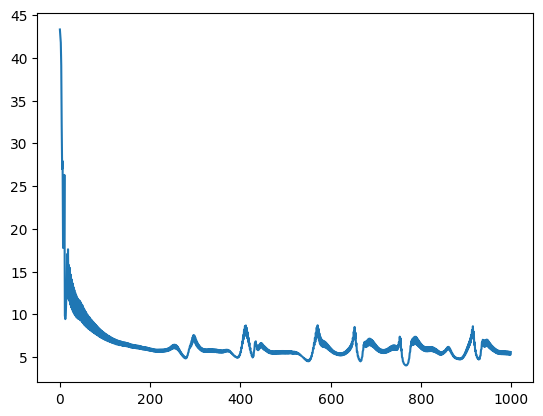

In [29]:
print(np.array(E).shape)
plt.plot(E)